In [259]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import os

# Let's look at the dataset files

In [260]:
print(os.listdir('../Weather WW2'))

['Weather WW2.ipynb', 'Weather Station Locations.csv', '.ipynb_checkpoints', 'Summary of Weather.csv']


#### The dataset contains two csv files. We will work with 'Summary of Weather'

In [261]:
nRows = 5000 # 'Summary of Weather.csv' has 119040 rows in reality, and we'll work with 5000 rows

In [262]:
weather_df = pd.read_csv('Summary of Weather.csv', delimiter=',') #, nrows = nRows)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [263]:
rows, cols = weather_df.shape # Passing the values of the dataset shape
print('We have',rows,'and', cols, 'columns')

We have 119040 and 31 columns


#### Finally, let's look at the data

In [264]:
weather_df.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# We Will predict the maximum temperature by the minimum

In [265]:
minT = weather_df['MinTemp'].values.reshape(-1,1)
maxT = weather_df['MaxTemp'].values.reshape(-1,1)

In [266]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(minT, maxT, test_size=1/5, random_state=0)

In [267]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

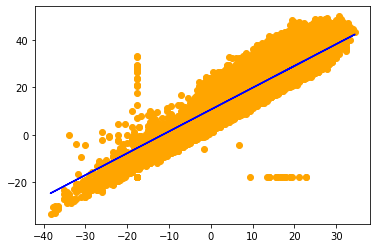

In [268]:
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,regressor.predict(x_train),c='blue')
plt.show()

### With this program, you can predict the maximum temperature by entering the minimum temperature during the WW2

In [269]:
userWord = []
arraySize = int(input("Enter the number of minimum temperature values you are going to enter"))
for i in range(arraySize):
    userWord.append(float(input("Element:")))
userWord = np.array(userWord).reshape(-1,1)
print("Results")
for i in userWord:
    print("Minimal temperature:",i.astype('int'),"Predicted Maximal temperature:",regressor.predict([i]))

Enter the number of minimum temperature values you are going to enter


ValueError: invalid literal for int() with base 10: ''